### Workshop - Decision Trees

This workshop deals with understanding the working of decision trees.

### Author: Hussein Hassan Hussein




# Importing libraries in Python

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Prepare Data

In [2]:
df = pd.read_csv("/content/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Split

In [6]:
target = "Species"
X = df.drop(columns = [target, "Id"])
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (150, 4)
y shape: (150,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


# Build Model

## Baseline

In [8]:
acc_baseline = y_train.value_counts(normalize= True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.3417


## Iterate

In [9]:
clf = RandomForestClassifier(random_state= 42)

In [10]:
params = {
    "n_estimators" : range(25, 100, 25),
    "max_depth" : range(1, 11)
}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(1, 11)}

In [11]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv = 5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [12]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [13]:
model.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [14]:
model.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

In [15]:
model.best_score_

0.95

In [16]:
model.predict(X_train)

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris

## Evaluate

In [17]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9583
Test Accuracy: 1.0


In [18]:
y_test.value_counts()

Iris-virginica     11
Iris-setosa        10
Iris-versicolor     9
Name: Species, dtype: int64

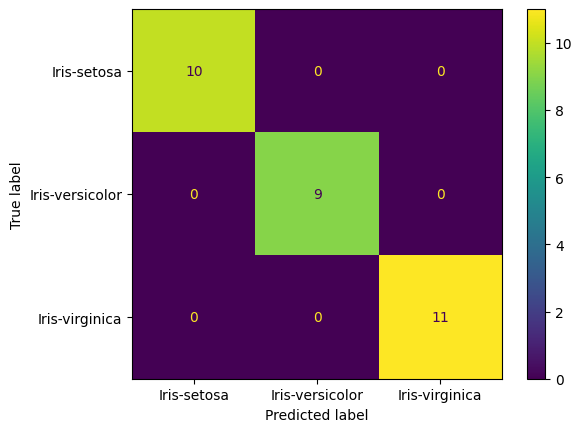

In [19]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

# Communicate

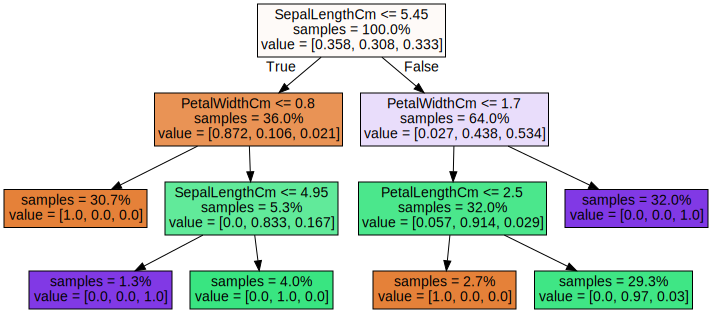

In [20]:
tree = model.best_estimator_.estimators_[49]
dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=3,
                               impurity=False,
                               proportion=True)
graph = graphviz.Source(dot_data)
display(graph)